In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [51]:
df = pd.read_csv('../input/Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


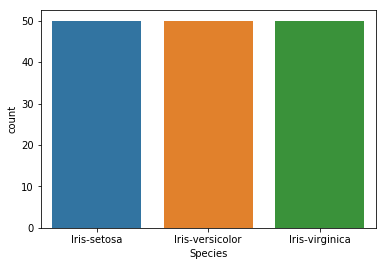

In [52]:
sns.countplot(df['Species'])


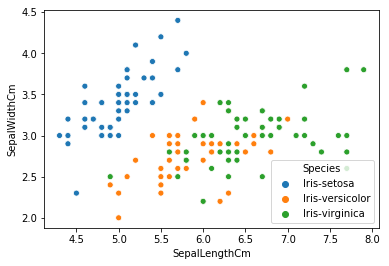

In [53]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df)

In [54]:
df = df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [55]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [56]:
x_features = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
y_features = ["Species"]
x_df = df[x_features]
y_df = df[y_features]

In [57]:
x_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
X_train, X_test, Y_train, Y_test = tts(x_df, y_df, test_size = 0.3, random_state = 5)

In [59]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [60]:
X_train = X_train.assign(b=1)
X_test = X_test.assign(b=1)

In [61]:
X_train.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,b
126,0.410479,-0.570977,0.583596,0.786638,1
61,0.054278,-0.131764,0.245046,0.395183,1
124,1.004146,0.527056,1.091421,1.178093,1
117,2.191481,1.625089,1.655671,1.308578,1
20,-0.539389,0.746663,-1.165579,-1.301122,1


In [62]:
Y_train.head()

,Species
126,2
61,1
124,2
117,2
20,0


In [63]:
n = len(X_train.columns)
weights1 = np.zeros((n,))
weights2 = np.zeros((n,))
weights3 = np.zeros((n,))


In [64]:
def multiclassperceptron(X_train, Y_train, weights1, weights2, weights3, epochs):
    for i in range(epochs):
        for index, row in X_train.iterrows():
            f1 = np.dot(weights1, row)
            f2 = np.dot(weights2, row)
            f3 = np.dot(weights3, row)
            if(f1 >= f2 and f2 >= f3):
                if(Y_train.loc[index].values[0] == 0):
                    continue
                if(Y_train.loc[index].values[0] == 1):
                    weights1 = weights1 + row
                    weights2 = weights2 - row
                if(Y_train.loc[index].values[0] == 2):
                    weights1 = weights1 + row
                    weights3 = weights3 - row
            if(f2 >= f3 and f3 >= f1):
                if(Y_train.loc[index].values[0] == 0):
                    weights1 = weights1 - row
                    weights2 = weights2 + row
                if(Y_train.loc[index].values[0] == 1):
                    continue
                if(Y_train.loc[index].values[0] == 2):
                    weights2 = weights2 + row
                    weights3 = weights3 - row

            if(f3 >= f2 and f2 >= f1):
                if(Y_train.loc[index].values[0] == 0):
                    weights1 = weights1 - row
                    weights3 = weights3 + row
                if(Y_train.loc[index].values[0] == 1):
                    weights2 = weights2 - row
                    weights3 = weights3 + row
                if(Y_train.loc[index].values[0] == 2):
                    continue
            
    return(weights1,weights2,weights3)


    

In [65]:
weights = multiclassperceptron(X_train, Y_train, weights1, weights2, weights3, 100)

In [66]:
def predict(weights, x_row):
    f1 = np.dot(weights[0],x_row)
    f2 = np.dot(weights[1],x_row)
    f3 = np.dot(weights[2],x_row)
    print(f1,f2,f3)
    k = [f1,f2,f3]
    return np.argmax(k)

74.82858059755156 -35.73025750498422 -39.09832309256735
230.2710676136842 -52.835052711045094 -177.43601490263907
268.9634313926824 -47.31349230829986 -221.6499390843826
-380.4124085142859 17.544423099412356 362.86798541487343
369.8054916693644 -43.244514836162246 -326.56097683320206
-30.68195815804073 -30.59962207528167 61.281580233322316
-301.5962811910137 4.7225319261791014 296.87374926483454
141.27317514357026 -29.537656315172804 -111.73551882839746
-281.30273790798736 2.5175061140506827 278.78523179393665
66.05673733758883 -26.610662934610374 -39.44607440297849
85.47344476779585 -28.912344761409013 -56.56110000638685
210.16925344108216 -46.67138000826367 -163.49787343281844
376.75237515455393 -57.818463998191085 -318.93391115636274
394.0516948601305 -63.366707078539704 -330.6849877815906
-307.4138332739918 14.177290679565353 293.2365425944264
-267.9957865122395 8.518358364250677 259.4774281479887
247.8535946974286 -51.01959781031487 -196.8339968871137
417.5919572699987 -67.4443620

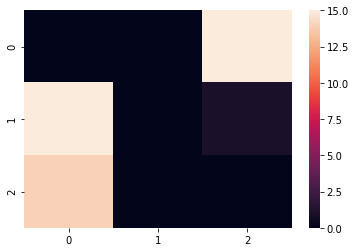

In [92]:
Y_predicted = [predict(weights, x) for x in X_test.values]
cm = confusion_matrix(Y_test, Y_predicted)
print("Confusion Matrix",cm)
ax = sns.heatmap(confusion_matrix(Y_test, Y_predicted))

In [68]:
 Y_test.iloc[23]

Species    1
Name: 72, dtype: int64

In [69]:
X_train.iloc[23]

SepalLengthCm    1.004146
SepalWidthCm    -0.131764
PetalLengthCm    0.809296
PetalWidthCm     1.439063
b                1.000000
Name: 145, dtype: float64

In [70]:
weights[0] - X_train.iloc[23]

SepalLengthCm    7691.743970
SepalWidthCm    -4381.504035
PetalLengthCm    9124.498320
PetalWidthCm     8919.513078
b                2401.000000
dtype: float64